In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (20, 12)

## Import data

In [4]:
trump = pd.read_json('data/trump.json')

In [5]:
trump.shape

(38397, 21)

In [6]:
trump.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url'],
      dtype='object')

## Data analysis

In [7]:
# dates covered by the dataset
print(trump.timestamp.min())
print(trump.timestamp.max())

2009-05-04 18:54:25
2019-11-11 23:58:14


In [9]:
#Make text for twitter lowercase to search for matching expressions
trump['text_lower'] = trump.text.str.lower()

In [23]:
# Test
expressions = ['fake news', 'false news', 'fake media', 'falsenews', 'fakemedia', 'enemy of the people']

for i in expressions:
    print('{}\n{}\n'.format(i, trump['text_lower'].str.contains(i).value_counts()))

fake news
False    37885
True       512
Name: text_lower, dtype: int64

false news
False    38396
True         1
Name: text_lower, dtype: int64

fake media
False    38379
True        18
Name: text_lower, dtype: int64

falsenews
False    38397
Name: text_lower, dtype: int64

fakemedia
False    38397
Name: text_lower, dtype: int64

enemy of the people
False    38366
True        31
Name: text_lower, dtype: int64



#### Function to count all fake news expressions

In [26]:

def fake_news_mentions(data, expressions = []):
    #find patterns
    for i in expressions:
        data[i] = data['text_lower'].str.contains(i)

    # Convert True/False values to 0/1
    data[expressions] = data[expressions].astype('int32')
        
    # Create column with total fake_news
    data['fake_news_mention'] = data[expressions].sum(axis=1)
    print('\nTotal fake_news labels: {}'.format(len(data[data['fake_news_mention'] > 0])))
    
    # Print value counts for expressions
    for i in expressions:
        print(data[i].value_counts())


In [27]:
expressions = ['fake news', 'false news', 'fake media', 'falsenews', 'fakemedia', 'enemy of the people']
fake_news_mentions(trump, expressions)


Total fake_news labels: 541
0    37885
1      512
Name: fake news, dtype: int64
0    38396
1        1
Name: false news, dtype: int64
0    38379
1       18
Name: fake media, dtype: int64
0    38397
Name: falsenews, dtype: int64
0    38397
Name: fakemedia, dtype: int64
0    38366
1       31
Name: enemy of the people, dtype: int64


#### Function to aggregate tweets by day, vis & basic summary

In [85]:

def aggregate_tweets_day(data):
    
    global fake_news
    
    d = {'timestamp':'tweets_per_day'}
    new_df = data.groupby(data.timestamp.dt.date).\
    agg({'timestamp':'count', 'fake_news_mention':'sum'}).rename(columns=d)
    
    fake_news = new_df[new_df['fake_news_mention'] > 0]
    fake_news.plot(style='o', alpha = 0.5)
    
    print('- Total tweets from Trump mentioning fake news expressions: {}'.format(fake_news.fake_news_mention.sum()))
    print('- First tweet: {}'.format(fake_news.index.min()))
    print('- Last tweet: {}'.format(fake_news.index.max()))
    
    res = (pd.Series(fake_news.index[1:]) - pd.Series(fake_news.index[:-1])).value_counts()
    print('- Average frequency: {0:.2f} days'.format(res.mean()))
    
    

- Total tweets from Trump mentioning fake news expressions: 562
- First tweet: 2016-11-16
- Last tweet: 2019-11-11
- Average frequency: 19.42 days


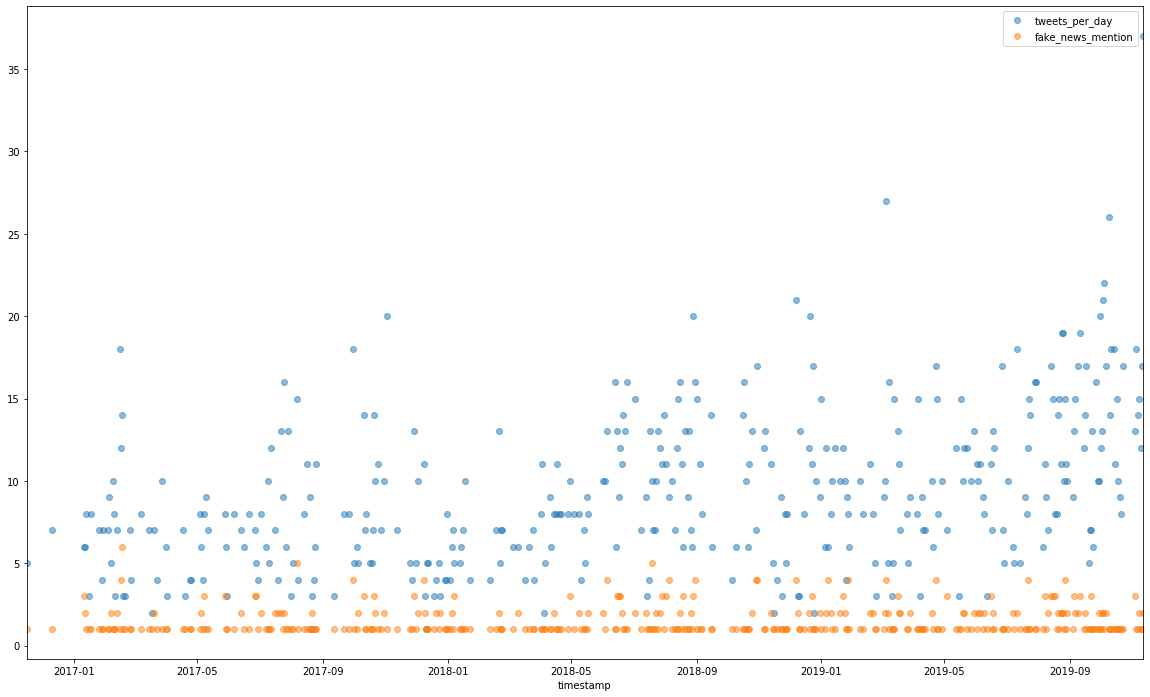

In [86]:
aggregate_tweets_day(trump)

In [87]:
# res = (pd.Series(fake_news.index[1:]) - pd.Series(fake_news.index[:-1])).value_counts()
# print('Average frequency for tweets mentioning fake news is: {} days '.format(res.mean()))
# plt.boxplot(res)

In [89]:
# Plot all fake news tweets in one single timeline as squares. x
# plt.plot(fake_news.index, fake_news.fake_news_mention, 'o', alpha = 0.3);